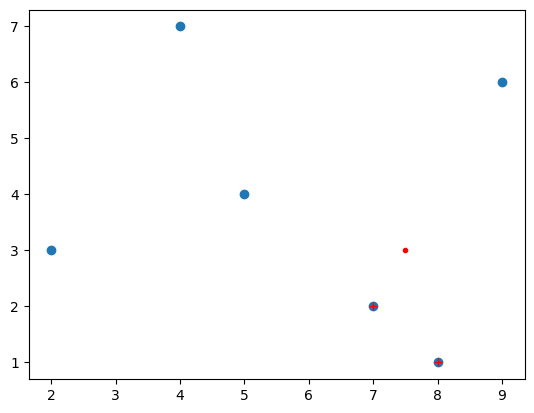

In [17]:
import numpy as np
import heapq


class Node:
    def __init__(self, data, sp=0, left=None, right=None):
        self.data = data
        self.sp = sp
        self.left = left
        self.right = right


class KDTree:
    def __init__(self, data):
        k = data.shape[1]
        def create(dataset, sp):
            if len(dataset) == 0:
                return None
            # sort by current dimension
            dataset = sorted(dataset, key=lambda x: x[sp])
            mid = len(dataset)//2
            # split by the median
            dat = dataset[mid]
            return Node(dat, sp, create(dataset[:mid], (sp+1) % k),\
                                 create(dataset[mid+1:], (sp+1) % k))
        self.root = create(data, 0)

    def nearest(self, x, near_k=1, p=2):
        # use the max heap builtin library heapq
        # init the elements with -inf, and use the minus distance for comparison
        # the top of the max heap is the min distance.
        self.knn = [(-np.inf, None)]*near_k
        def visit(node):
            if not node == None:
                # cal the distance to the split point, i.e. the hyperplane
                dis = x[node.sp] - node.data[node.sp]
                # visit the child node recursively
                # if returned, we get the current nearest point
                visit(node.left if dis < 0 else node.right)
                # cal the distance to the current nearest point
                curr_dis = np.linalg.norm(x-node.data, p)
                # push the minus distance to the heap
                heapq.heappushpop(self.knn, (-curr_dis, node))
                # compare the distance to the hyperplane with the min distance
                # if less, visit another node.
                if -(self.knn[0][0]) > abs(dis):
                    visit(node.right if dis < 0 else node.left)
        visit(self.root)
        self.knn = np.array(
            [i[1].data for i in heapq.nlargest(near_k, self.knn)])
        return self.knn


if __name__ == "__main__":
    from pylab import *
    data = array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
    kdtree = KDTree(data)
    target = array([7.5, 3])
    kdtree.nearest(target, 2)
    plot(*data.T, 'o')
    plot(*target.T, '.r')
    plot(*kdtree.knn.T, 'r+')
    show()